# Transfer Learning Pt. 2: Fine Tuning


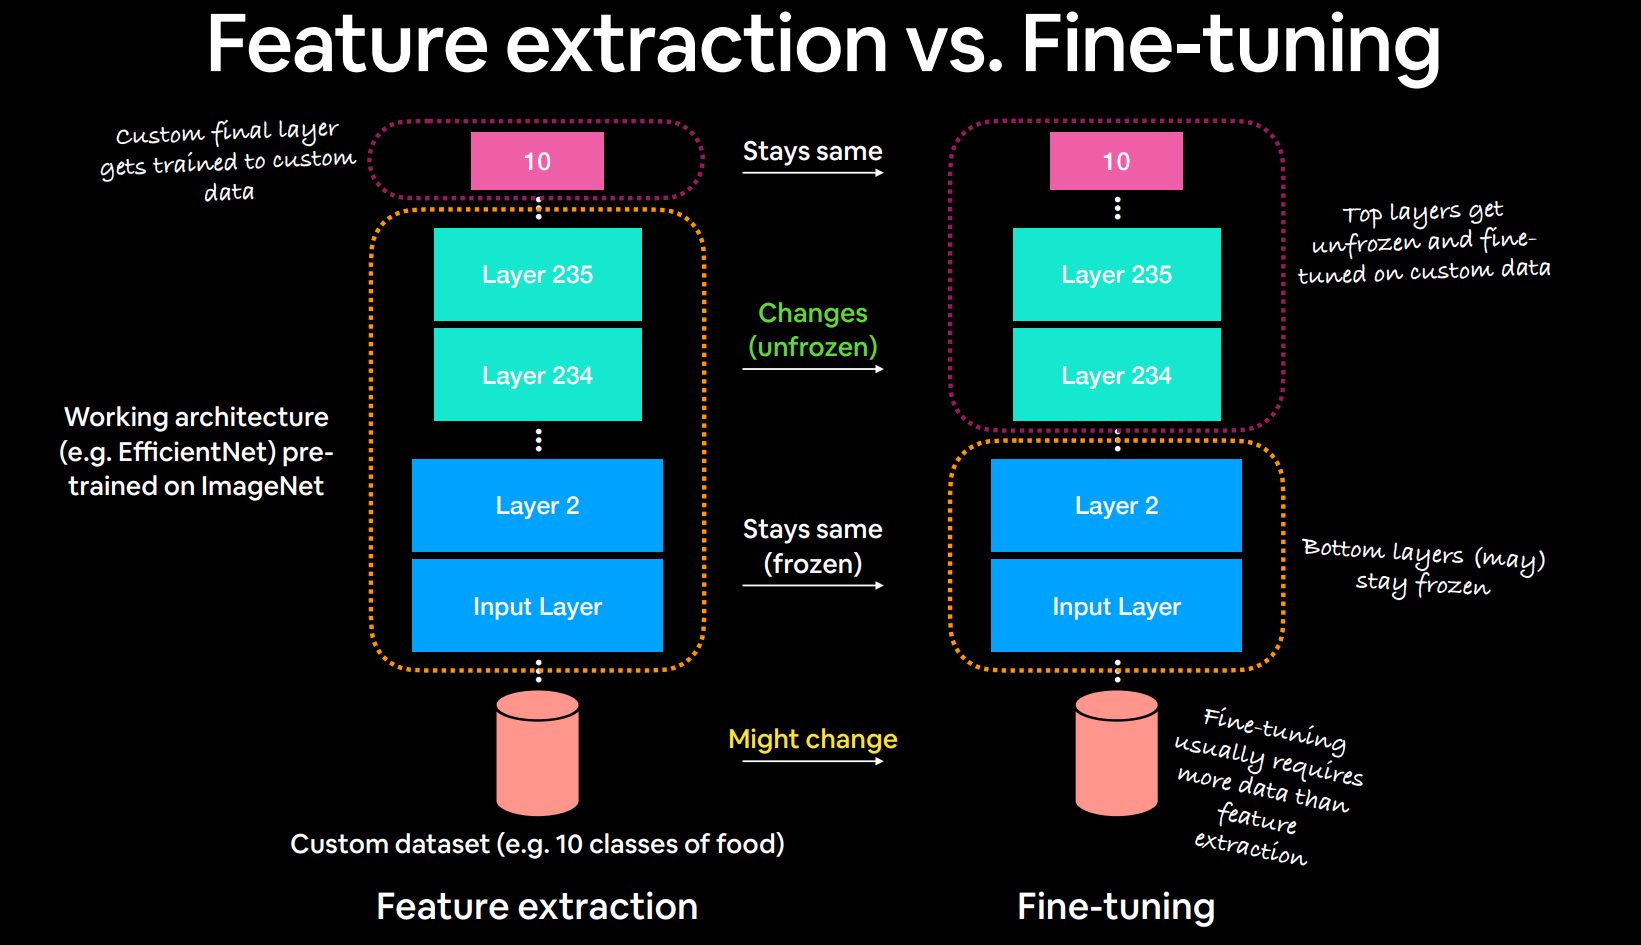

top layers get unfrozen and fine-tuned on our custom data.  Could unfreeze the top 10 layers or we could even unfreeze all the layers.

fine-tuning usually requires more data than feature extraction.

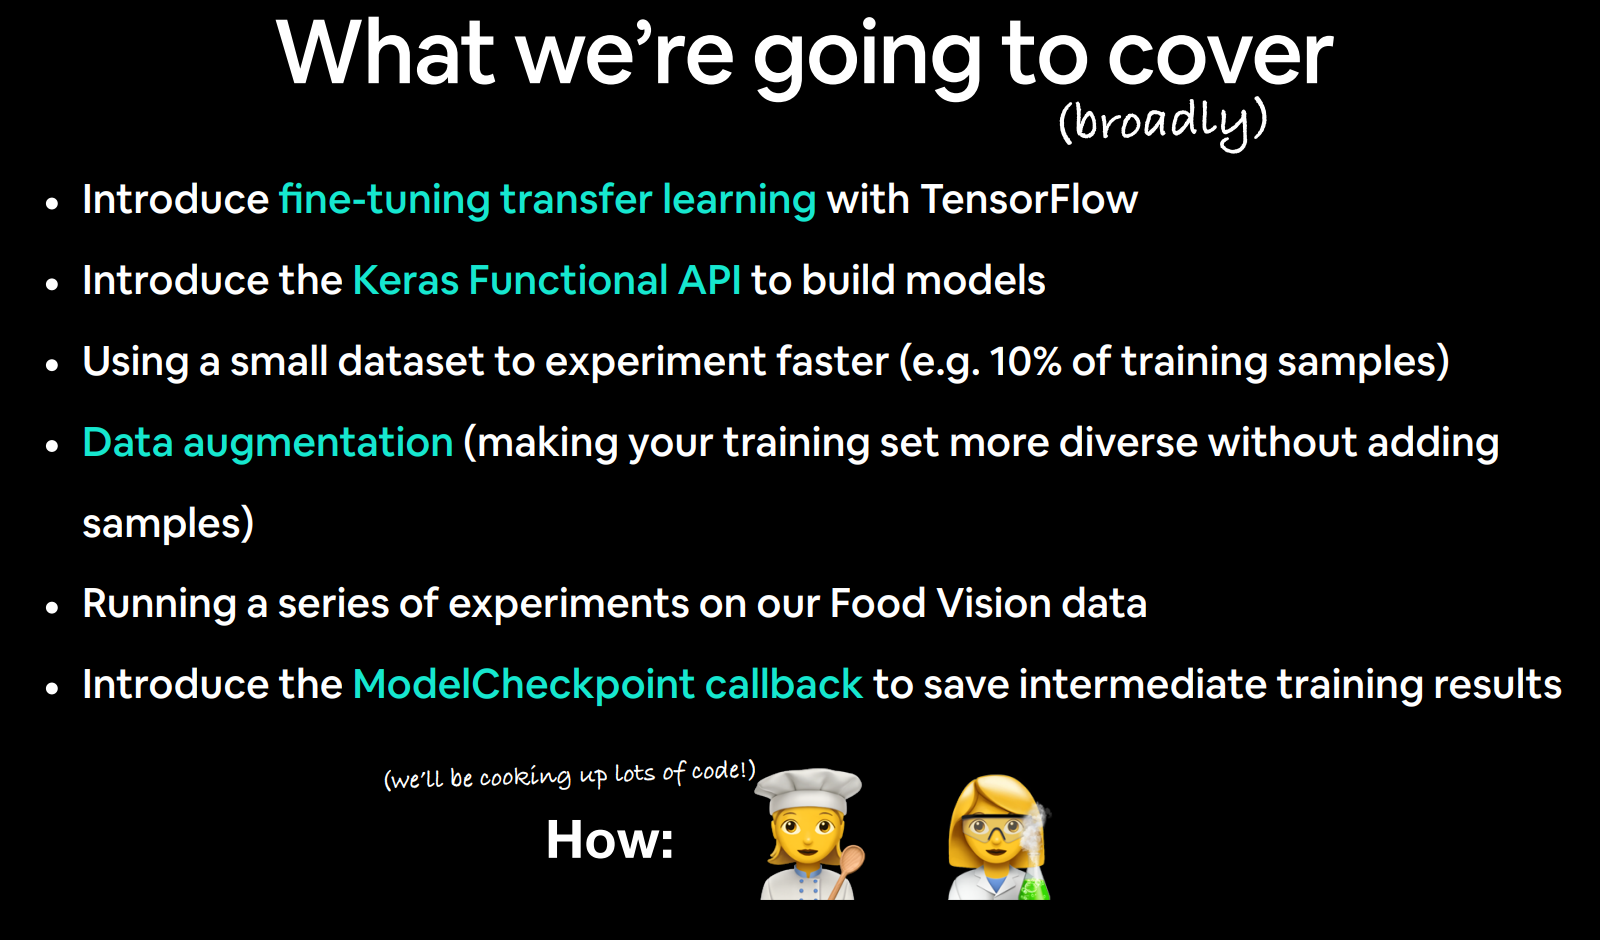

In previous notebooks we've created a bunch of helper functions. We could create them again, except that's really tedious. So we have a py file will all those functions in a seperate file that we can import. 

In [1]:
import helper_functions
import os
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
#from tensorflow.keras.applications

#### Let's get some data

THis time we're going to see how we can use the pretrained models within tf.keras.applications. Here there are different models built inside tf and apply them to our own problem.

- https://www.tensorflow.org/api_docs/python/tf/keras/applications

In [2]:
dataset = 'datasets/10_food_classes_10_percent/'

helper_functions.walk_through_dir(dataset)

There are 2 directories and 0 images in 'datasets/10_food_classes_10_percent/'.
There are 10 directories and 0 images in 'datasets/10_food_classes_10_percent/test'.
There are 0 directories and 250 images in 'datasets/10_food_classes_10_percent/test\chicken_curry'.
There are 0 directories and 250 images in 'datasets/10_food_classes_10_percent/test\chicken_wings'.
There are 0 directories and 250 images in 'datasets/10_food_classes_10_percent/test\fried_rice'.
There are 0 directories and 250 images in 'datasets/10_food_classes_10_percent/test\grilled_salmon'.
There are 0 directories and 250 images in 'datasets/10_food_classes_10_percent/test\hamburger'.
There are 0 directories and 250 images in 'datasets/10_food_classes_10_percent/test\ice_cream'.
There are 0 directories and 250 images in 'datasets/10_food_classes_10_percent/test\pizza'.
There are 0 directories and 250 images in 'datasets/10_food_classes_10_percent/test\ramen'.
There are 0 directories and 250 images in 'datasets/10_food_c

In [3]:
# create training and test directory paths
train_dir = os.path.join(dataset, 'train')
test_dir = os.path.join(dataset, 'test')
print(train_dir, test_dir)

datasets/10_food_classes_10_percent/train datasets/10_food_classes_10_percent/test


Instead of using imagedatagenerator like we've use previously we're going to use image_dataset_from_directory

In [4]:
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_10_percent = image_dataset_from_directory(directory = train_dir,
                                                    image_size = IMG_SIZE,
                                                    label_mode = 'categorical',
                                                    batch_size = BATCH_SIZE)

test_data = image_dataset_from_directory(directory = test_dir,
                                        image_size = IMG_SIZE,
                                        label_mode = 'categorical',
                                        batch_size = BATCH_SIZE)

"""	String describing the encoding of labels. Options are:
'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).
'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).
'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy).
None (no labels)."""

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


"\tString describing the encoding of labels. Options are:\n'int': means that the labels are encoded as integers (e.g. for sparse_categorical_crossentropy loss).\n'categorical' means that the labels are encoded as a categorical vector (e.g. for categorical_crossentropy loss).\n'binary' means that the labels (there can be only 2) are encoded as float32 scalars with values 0 or 1 (e.g. for binary_crossentropy).\nNone (no labels)."

In [5]:
train_data_10_percent
#turns our dataset into a BatchDataset object

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

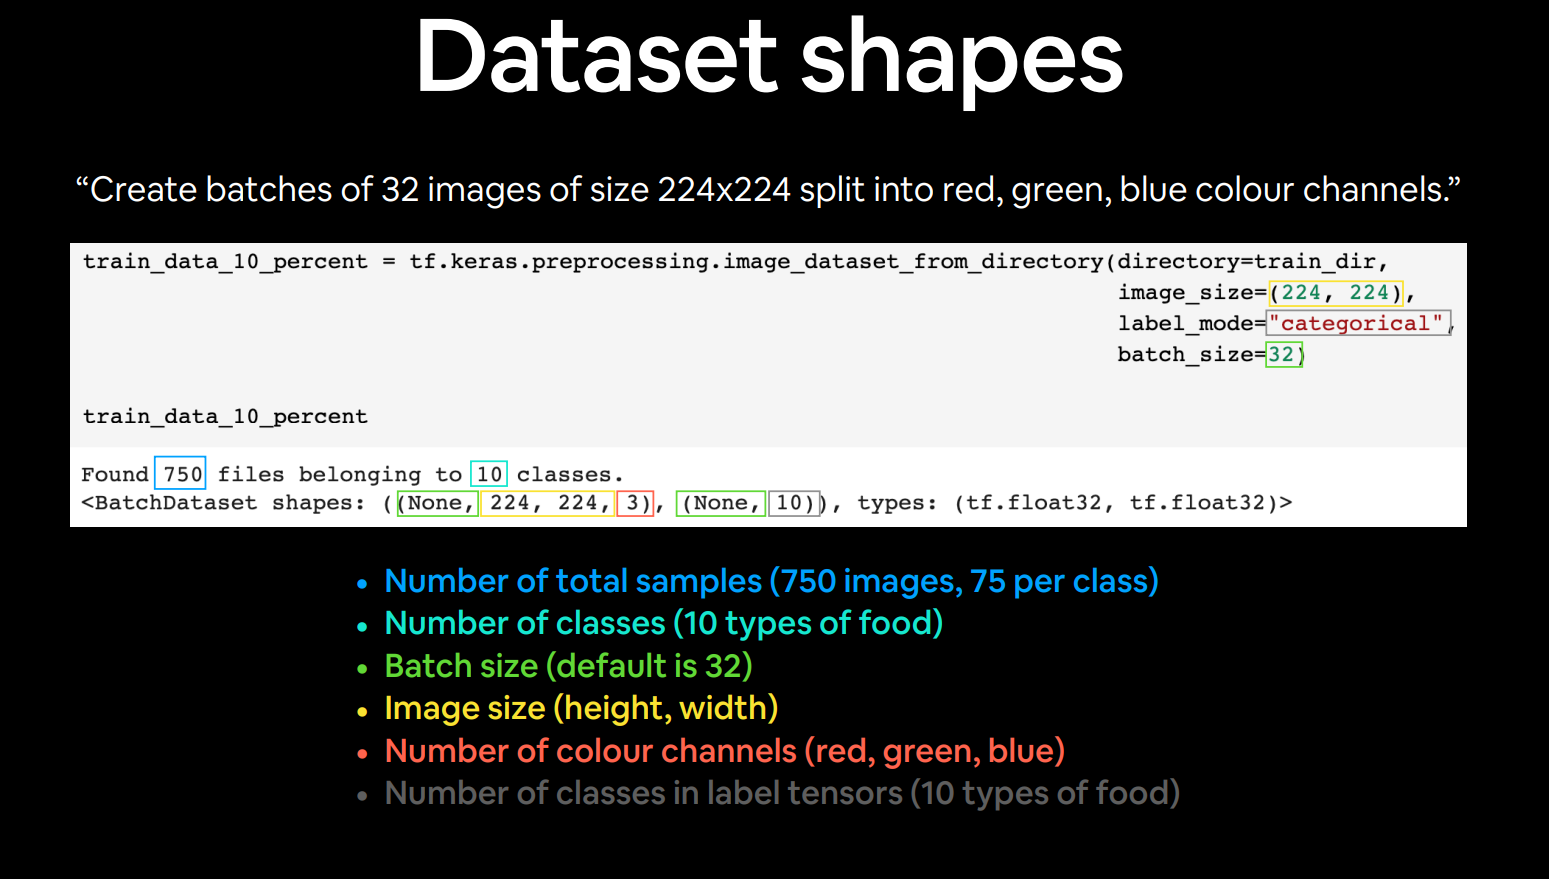

In [6]:
#check out class names
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [7]:
for images, labels in train_data_10_percent.take(1):
    print(images, labels)
#32 different images and the labels for those 32 images
#take basically returns a batch of data

tf.Tensor(
[[[[8.00000000e+00 9.00000000e+00 1.30000000e+01]
   [8.00000000e+00 9.00000000e+00 1.30000000e+01]
   [8.00000000e+00 9.00000000e+00 1.30000000e+01]
   ...
   [4.00000000e+00 8.00000000e+00 1.10000000e+01]
   [3.26116085e+00 7.26116085e+00 1.02611609e+01]
   [3.26116085e+00 7.26116085e+00 1.02611609e+01]]

  [[8.00000000e+00 9.00000000e+00 1.30000000e+01]
   [8.00000000e+00 9.00000000e+00 1.30000000e+01]
   [8.00000000e+00 9.00000000e+00 1.30000000e+01]
   ...
   [4.78348207e+00 8.78348160e+00 1.17834816e+01]
   [5.56696415e+00 9.56696415e+00 1.25669641e+01]
   [6.35044622e+00 1.03504467e+01 1.33504467e+01]]

  [[8.00000000e+00 9.00000000e+00 1.30000000e+01]
   [8.00000000e+00 9.00000000e+00 1.30000000e+01]
   [8.00000000e+00 9.00000000e+00 1.30000000e+01]
   ...
   [8.54608440e+00 9.54608440e+00 1.29344769e+01]
   [1.06116076e+01 1.16116076e+01 1.50000000e+01]
   [1.16116076e+01 1.26116076e+01 1.60000000e+01]]

  ...

  [[6.00000000e+00 5.00000000e+00 1.10000000e+01]
   [6

#### Experiements we're going to run

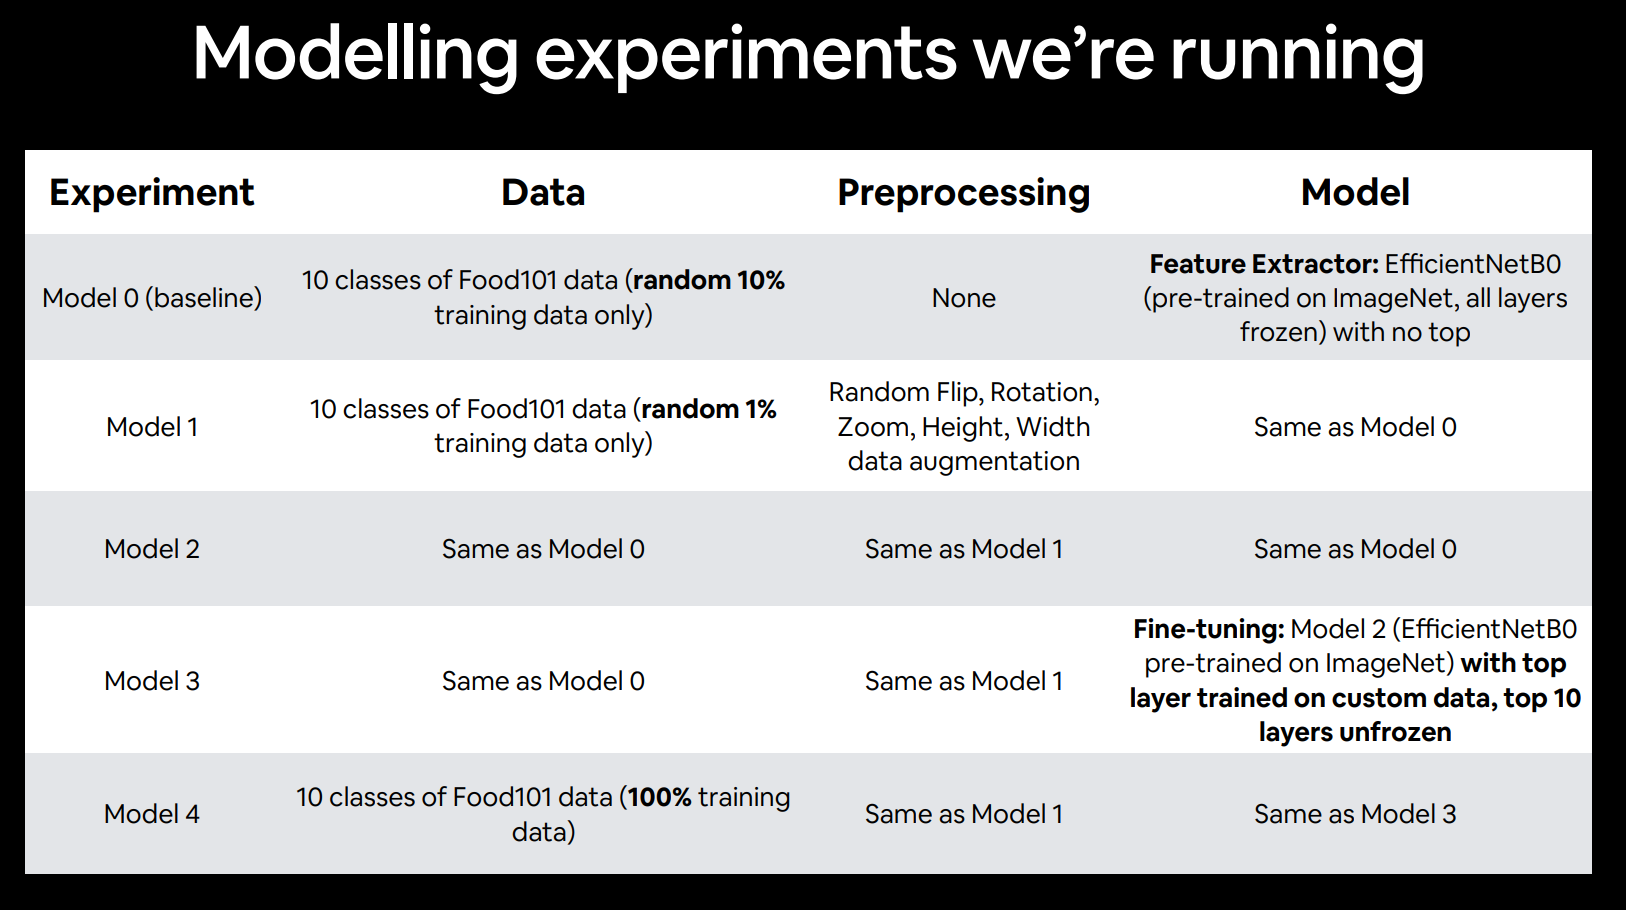

#### Comparing Sequential API vs Functional API

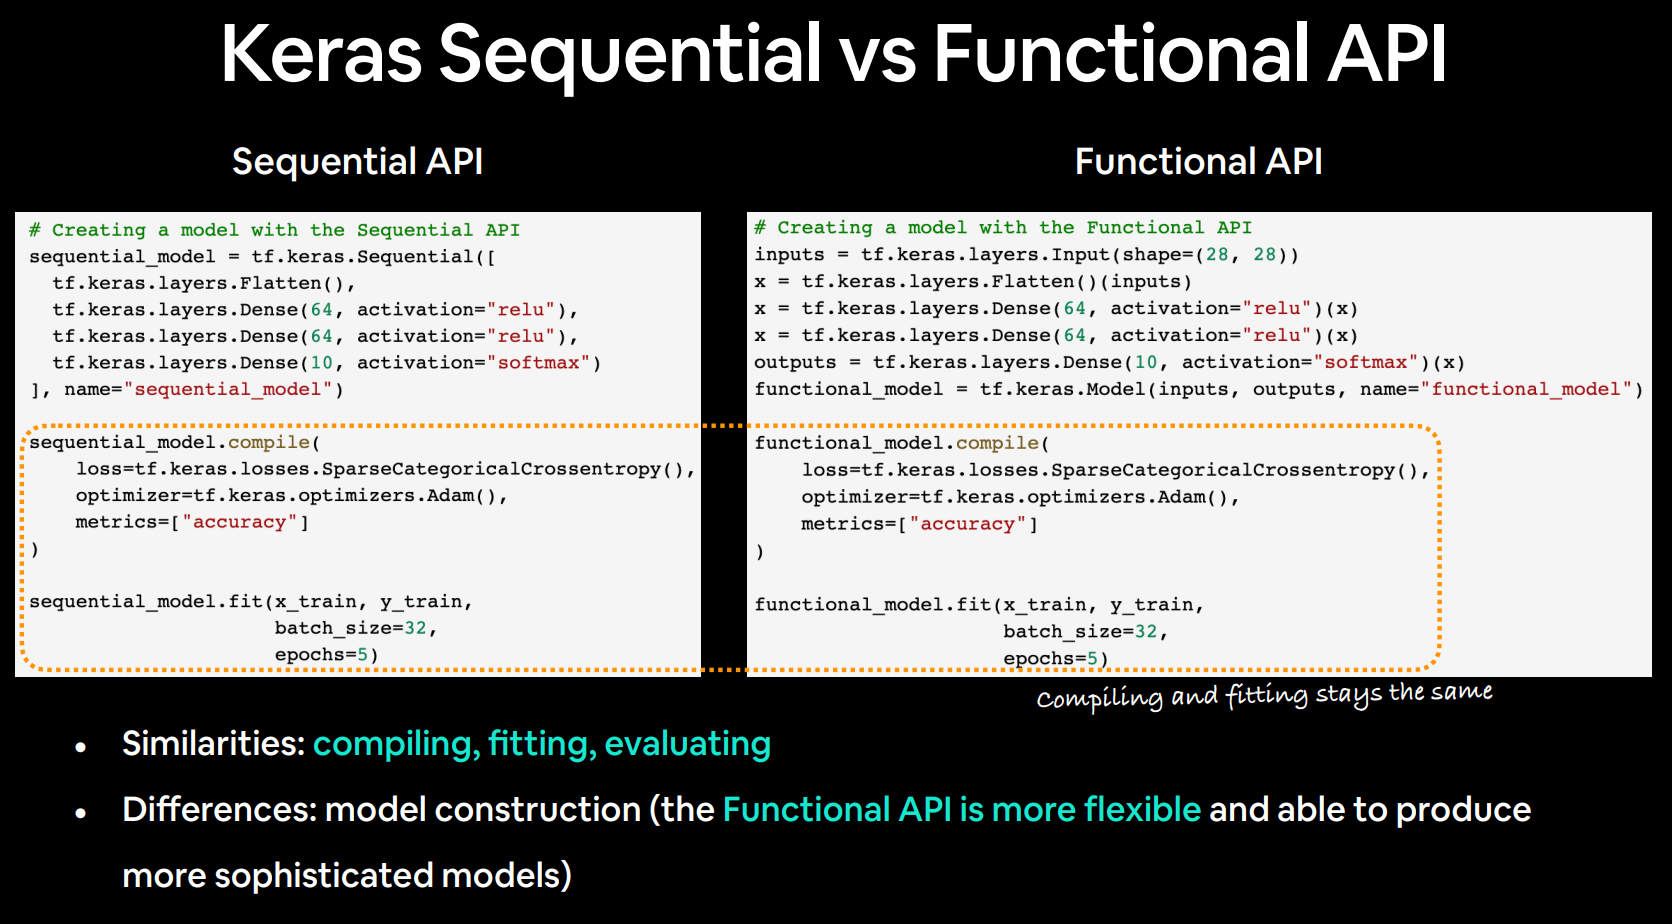

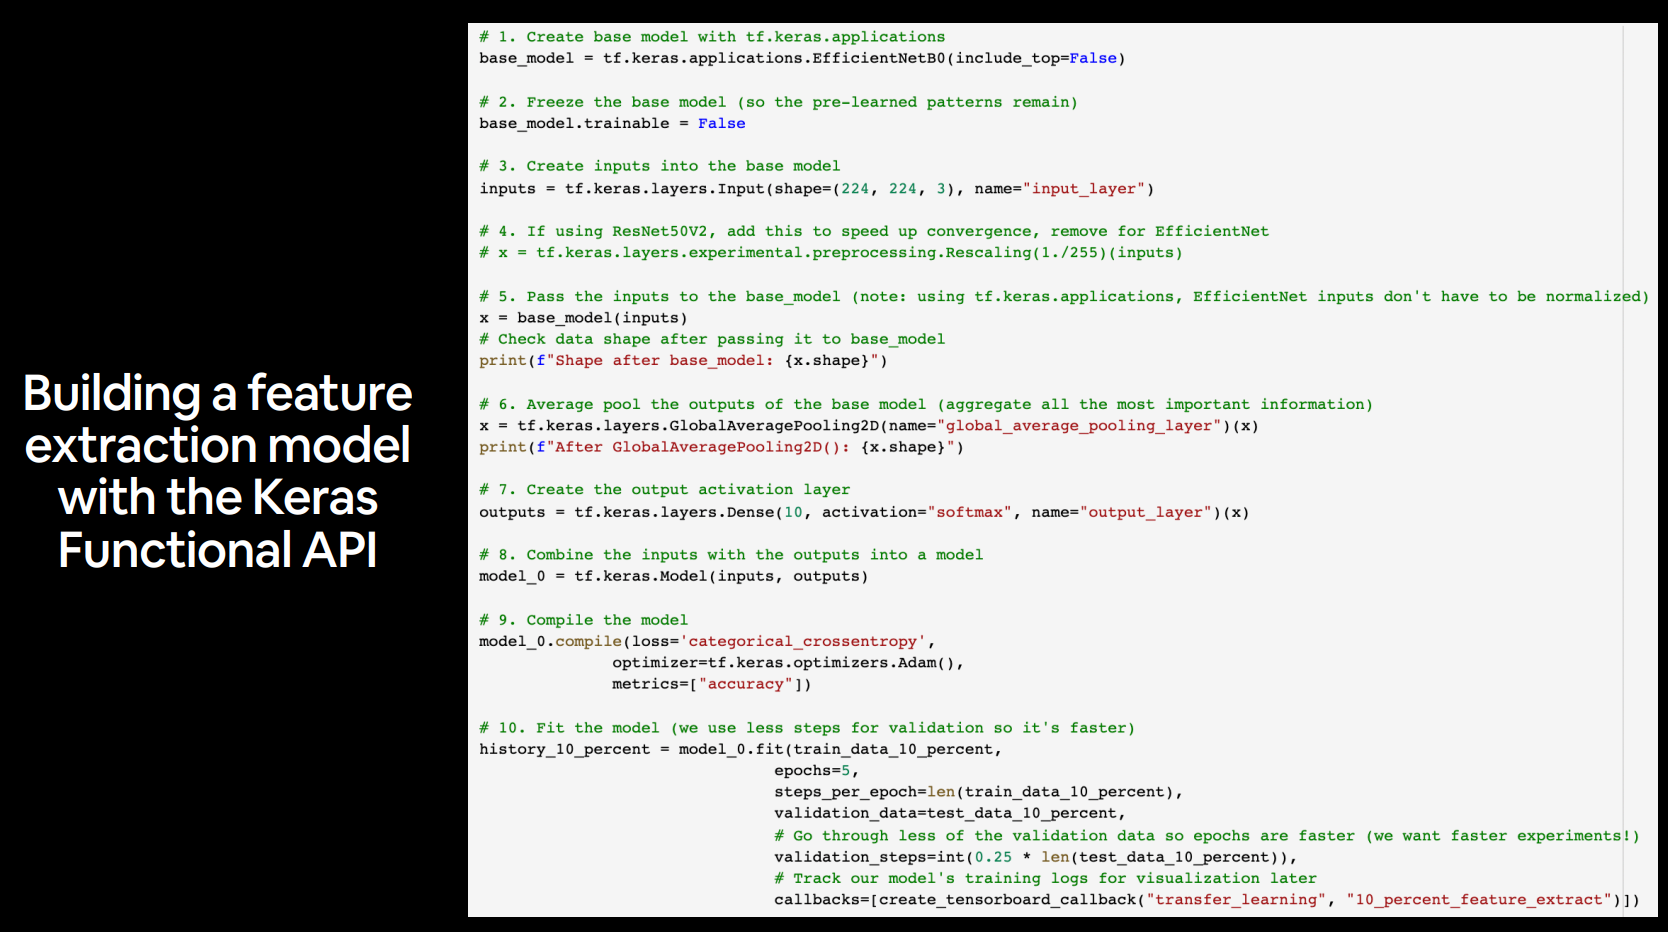

In [8]:
# incase we get an error in the code going forward we'll use the snippet below which should work
#base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

#### Creating our first model with the Functional API

The sequential api is straight-forward. it runs our layers in sequential order. but the functional api gives us more flexibility with out models

In [9]:
#create the base model
#dont include the top layer because we only want the top layer to be our 10 classes rather
#than the 1000 imagenet classes the model was trained on
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)

#freeze the base model so the pre-learned patterns remain
base_model.trainable = False

#create the inputs 
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')

# if you're using a model like resnet50v2 you will need to normalize inputs
# you don't have to for efficientnet since the rescaling layer is built in
#x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255.)(inputs)

#pass the inputs to the bas emodel
x = base_model(inputs)
print(f'shape after passing inputs through base_model: {x.shape}')

#average pool the outputs of the basemodel (agg all the most important information, reduce number of computation)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_average_pooling_layer')(x)
print(f'shape after global average pooling 2d: {x.shape}')

# create the output activation layer
outputs = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer')(x)

#finally we're going to combine outputs and inputs into a model
model0 = tf.keras.Model(inputs, outputs)

#compile the model
model0.compile(loss = 'categorical_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

#fit the model and save its history
history0 = model0.fit(train_data_10_percent,
                    epochs = 5,
                    steps_per_epoch = len(train_data_10_percent),
                    validation_data = test_data,
                    validation_steps = len(test_data),
                    callbacks = [helper_functions.create_tensorboard_callback(dir_name = 'transfer_learning_hub', 
                                                                              experiment_name = '10_percent_feature_extraction')])

shape after passing inputs through base_model: (None, 7, 7, 1280)
shape after global average pooling 2d: (None, 1280)
Saving TensorBoard log files to: transfer_learning_hub/10_percent_feature_extraction/20231108-214808
Epoch 1/5
24/24 [==============================] - 32s 350ms/step - loss: 1.9646 - accuracy: 0.3440 - val_loss: 1.4005 - val_accuracy: 0.6820
Epoch 2/5
24/24 [==============================] - 6s 272ms/step - loss: 1.2017 - accuracy: 0.7253 - val_loss: 0.9391 - val_accuracy: 0.7912
Epoch 3/5
24/24 [==============================] - 6s 269ms/step - loss: 0.8748 - accuracy: 0.8147 - val_loss: 0.7473 - val_accuracy: 0.8336
Epoch 4/5
24/24 [==============================] - 6s 269ms/step - loss: 0.7025 - accuracy: 0.8573 - val_loss: 0.6464 - val_accuracy: 0.8456
Epoch 5/5
24/24 [==============================] - 6s 269ms/step - loss: 0.6116 - accuracy: 0.8613 - val_loss: 0.5851 - val_accuracy: 0.8568


In [10]:
#eval on full test dataset
model0.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.5851 - accuracy: 0.8568


[0.5851203799247742, 0.8568000197410583]

In [11]:
#check the layers in our base_model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv
4 stem_bn
5 stem_activation
6 block1a_project_conv
7 block1a_project_bn
8 block1a_project_activation
9 block2a_expand_conv
10 block2a_expand_bn
11 block2a_expand_activation
12 block2a_project_conv
13 block2a_project_bn
14 block2b_expand_conv
15 block2b_expand_bn
16 block2b_expand_activation
17 block2b_project_conv
18 block2b_project_bn
19 block2b_drop
20 block2b_add
21 block3a_expand_conv
22 block3a_expand_bn
23 block3a_expand_activation
24 block3a_project_conv
25 block3a_project_bn
26 block3b_expand_conv
27 block3b_expand_bn
28 block3b_expand_activation
29 block3b_project_conv
30 block3b_project_bn
31 block3b_drop
32 block3b_add
33 block4a_expand_conv
34 block4a_expand_bn
35 block4a_expand_activation
36 block4a_dwconv2
37 block4a_bn
38 block4a_activation
39 block4a_se_squeeze
40 block4a_se_reshape
41 block4a_se_reduce
42 block4a_se_expand
43 block4a_se_excite
44 block4a_project_conv
45 block4a_project_bn
46 block4b_expand_conv
47 block

In [12]:
#summary of base model
base_model.summary()

Model: "efficientnetv2-b0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   0           ['rescaling[0][0]']              
                                3)                                                

                                                                                                  
 block3b_expand_bn (BatchNormal  (None, None, None,   768        ['block3b_expand_conv[0][0]']    
 ization)                       192)                                                              
                                                                                                  
 block3b_expand_activation (Act  (None, None, None,   0          ['block3b_expand_bn[0][0]']      
 ivation)                       192)                                                              
                                                                                                  
 block3b_project_conv (Conv2D)  (None, None, None,   9216        ['block3b_expand_activation[0][0]
                                48)                              ']                               
                                                                                                  
 block3b_p

                                384)                              'block4b_se_expand[0][0]']      
                                                                                                  
 block4b_project_conv (Conv2D)  (None, None, None,   36864       ['block4b_se_excite[0][0]']      
                                96)                                                               
                                                                                                  
 block4b_project_bn (BatchNorma  (None, None, None,   384        ['block4b_project_conv[0][0]']   
 lization)                      96)                                                               
                                                                                                  
 block4b_drop (Dropout)         (None, None, None,   0           ['block4b_project_bn[0][0]']     
                                96)                                                               
          

 block5a_se_excite (Multiply)   (None, None, None,   0           ['block5a_activation[0][0]',     
                                576)                              'block5a_se_expand[0][0]']      
                                                                                                  
 block5a_project_conv (Conv2D)  (None, None, None,   64512       ['block5a_se_excite[0][0]']      
                                112)                                                              
                                                                                                  
 block5a_project_bn (BatchNorma  (None, None, None,   448        ['block5a_project_conv[0][0]']   
 lization)                      112)                                                              
                                                                                                  
 block5b_expand_conv (Conv2D)   (None, None, None,   75264       ['block5a_project_bn[0][0]']     
          

                                                                                                  
 block5c_project_bn (BatchNorma  (None, None, None,   448        ['block5c_project_conv[0][0]']   
 lization)                      112)                                                              
                                                                                                  
 block5c_drop (Dropout)         (None, None, None,   0           ['block5c_project_bn[0][0]']     
                                112)                                                              
                                                                                                  
 block5c_add (Add)              (None, None, None,   0           ['block5c_drop[0][0]',           
                                112)                              'block5b_add[0][0]']            
                                                                                                  
 block5d_e

                                112)                                                              
                                                                                                  
 block5e_project_bn (BatchNorma  (None, None, None,   448        ['block5e_project_conv[0][0]']   
 lization)                      112)                                                              
                                                                                                  
 block5e_drop (Dropout)         (None, None, None,   0           ['block5e_project_bn[0][0]']     
                                112)                                                              
                                                                                                  
 block5e_add (Add)              (None, None, None,   0           ['block5e_drop[0][0]',           
                                112)                              'block5d_add[0][0]']            
          

 block6b_drop (Dropout)         (None, None, None,   0           ['block6b_project_bn[0][0]']     
                                192)                                                              
                                                                                                  
 block6b_add (Add)              (None, None, None,   0           ['block6b_drop[0][0]',           
                                192)                              'block6a_project_bn[0][0]']     
                                                                                                  
 block6c_expand_conv (Conv2D)   (None, None, None,   221184      ['block6b_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6c_expand_bn (BatchNormal  (None, None, None,   4608       ['block6c_expand_conv[0][0]']    
 ization) 

                                                                                                  
 block6d_drop (Dropout)         (None, None, None,   0           ['block6d_project_bn[0][0]']     
                                192)                                                              
                                                                                                  
 block6d_add (Add)              (None, None, None,   0           ['block6d_drop[0][0]',           
                                192)                              'block6c_add[0][0]']            
                                                                                                  
 block6e_expand_conv (Conv2D)   (None, None, None,   221184      ['block6d_add[0][0]']            
                                1152)                                                             
                                                                                                  
 block6e_e

 lization)                      192)                                                              
                                                                                                  
 block6f_drop (Dropout)         (None, None, None,   0           ['block6f_project_bn[0][0]']     
                                192)                                                              
                                                                                                  
 block6f_add (Add)              (None, None, None,   0           ['block6f_drop[0][0]',           
                                192)                              'block6e_add[0][0]']            
                                                                                                  
 block6g_expand_conv (Conv2D)   (None, None, None,   221184      ['block6f_add[0][0]']            
                                1152)                                                             
          

 block6h_project_bn (BatchNorma  (None, None, None,   768        ['block6h_project_conv[0][0]']   
 lization)                      192)                                                              
                                                                                                  
 block6h_drop (Dropout)         (None, None, None,   0           ['block6h_project_bn[0][0]']     
                                192)                                                              
                                                                                                  
 block6h_add (Add)              (None, None, None,   0           ['block6h_drop[0][0]',           
                                192)                              'block6g_add[0][0]']            
                                                                                                  
 top_conv (Conv2D)              (None, None, None,   245760      ['block6h_add[0][0]']            
          

In [13]:
#how about a summary for our whole model
model0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5,932,122
Trainable params: 12,810
Non-trainable params: 5,919,312
_________________________________________________________________


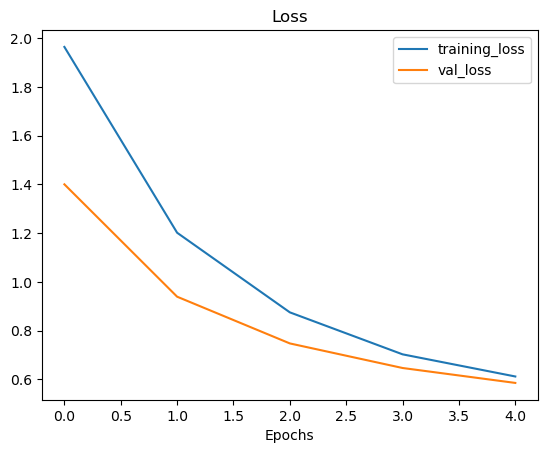

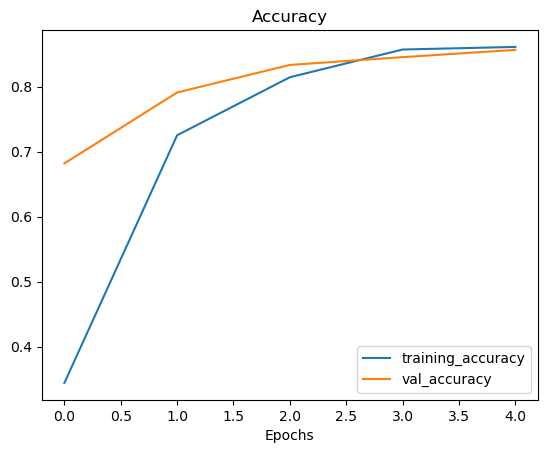

In [14]:
#plot loss curves
helper_functions.plot_loss_curves(history0)

### Getting a feature vector from a trained model

- the feature vector is what comes out of the trained model. In this case it's the output from the GlobalAveragePooling2D layer, which has a shape of (None, 1280).

- It's what we feed to our dense layer, and the dense layer is the only layer that actually gets trained.

#### Let's demonstarte the global average pooling 2d lyaer.
we have a tensor after our model goes through base_model of shape (None, 7, 7, 1280)... 

but then when it passes through GlobalAveragePooling2D, it turns into (None, 1280). 

Let's use a similar shaped tensor of (1,4,4,3) then pass it to GlobalAveragePooling2D.

In [15]:
# globalaveragepooling2d basically transforms a 4d tensor into a 2d tensor.

#define input shape
input_shape = (1,5,4,3)

#create random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f' random input tensor: \n {input_tensor}')


#pass random tensor through global average pooling 2d layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f'gap tensor: \n {global_average_pooled_tensor}')

#check shape of different tensors
print(f'input_tensor shape: {input_tensor.shape}')

print(f'gap tensor shape: {global_average_pooled_tensor.shape}')

 random input tensor: 
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]

  [[ 0.70402247 -0.33421248  0.21639644]
   [-0.97485447 -0.20757681 -0.03647729]
   [-1.3353444   0.6885855   1.1110833 ]
   [ 0.40130252  0.6320586  -0.39030614]]]]
gap tensor: 
 [[-0.13519286 -0.32778087 -0.18581301]]
input_tensor shape: (1, 5, 4, 3)
gap tensor shape: (1, 3)


started with a tensor of (1,4,4,3) and return a feature vector of (1,3).

The gap feature vector is what's passed into our dense layer.

It really just takes the average across the middle 2 axis.


In [16]:
#lets replicate the gap.
tf.reduce_mean(input_tensor, axis = [1,2])

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.13519286, -0.32778087, -0.18581301]], dtype=float32)>

In [17]:
#lets look at what globalmaxpool2d does instead
tf.keras.layers.GlobalMaxPool2D()(input_tensor)
#hint it returns the largest argmax on axis [1,2]

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.9058464, 1.1603122, 1.6994323]], dtype=float32)>

one of the reasons feature extraction transfer learning is named how it is is because what often happens is pretrained model outputs a feature vector (a long tensor of numbers which respresents the learned representation of the model on a particular sample, in our case, this is the output of the tf.keras.layers.GlobalAveragePooling2D() layer) which can then be used to extract patterns out for our own specific problem.

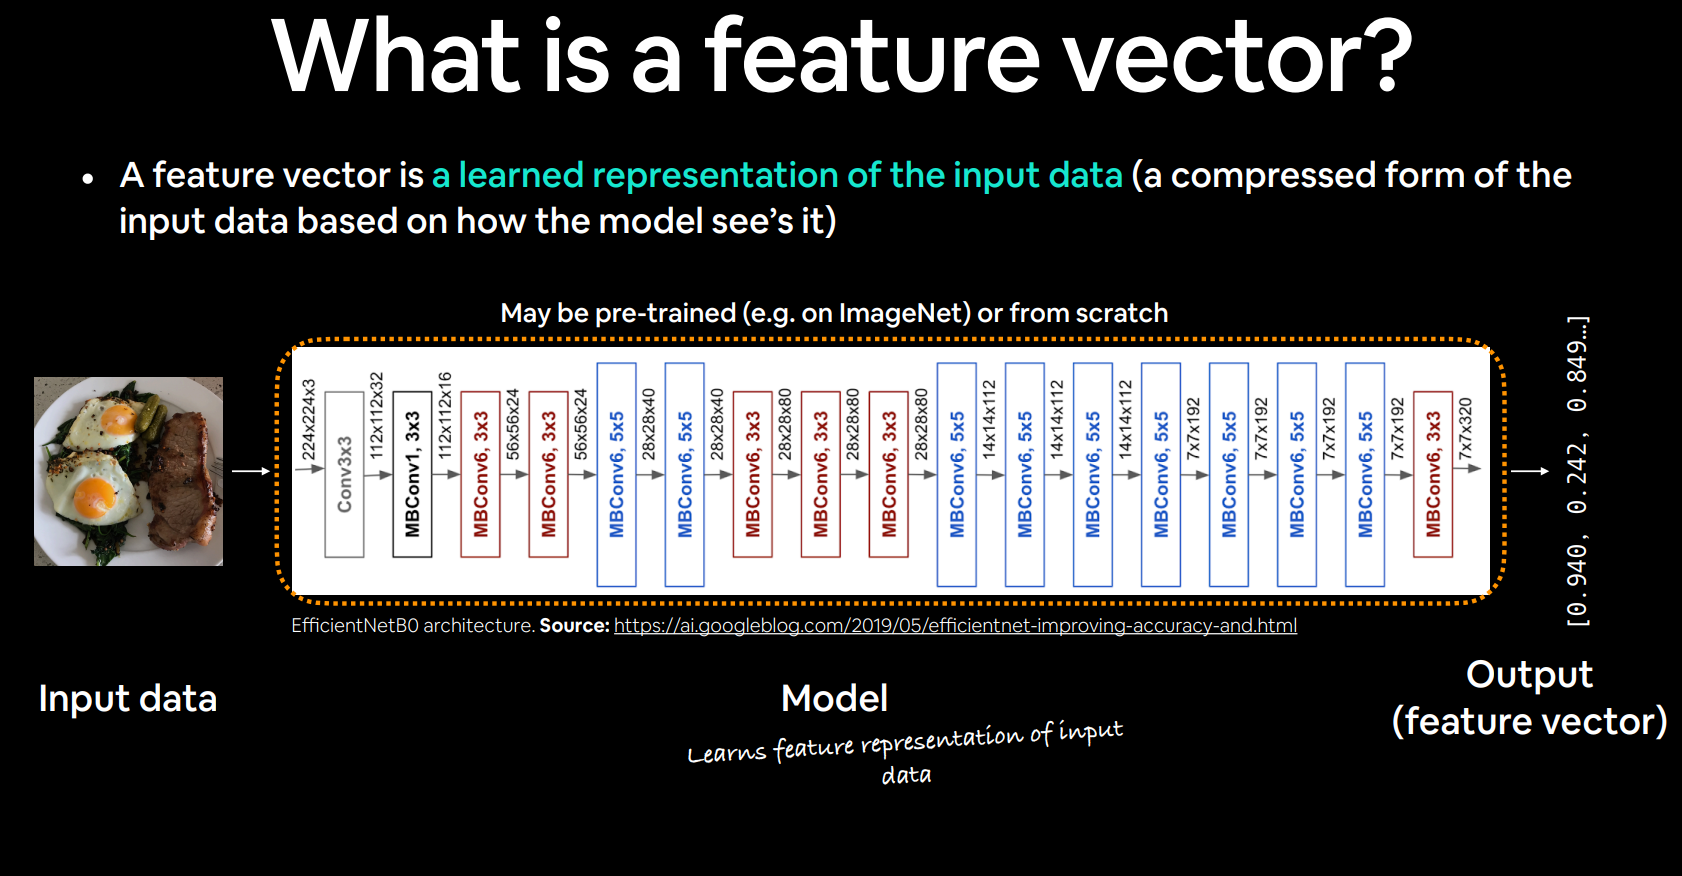

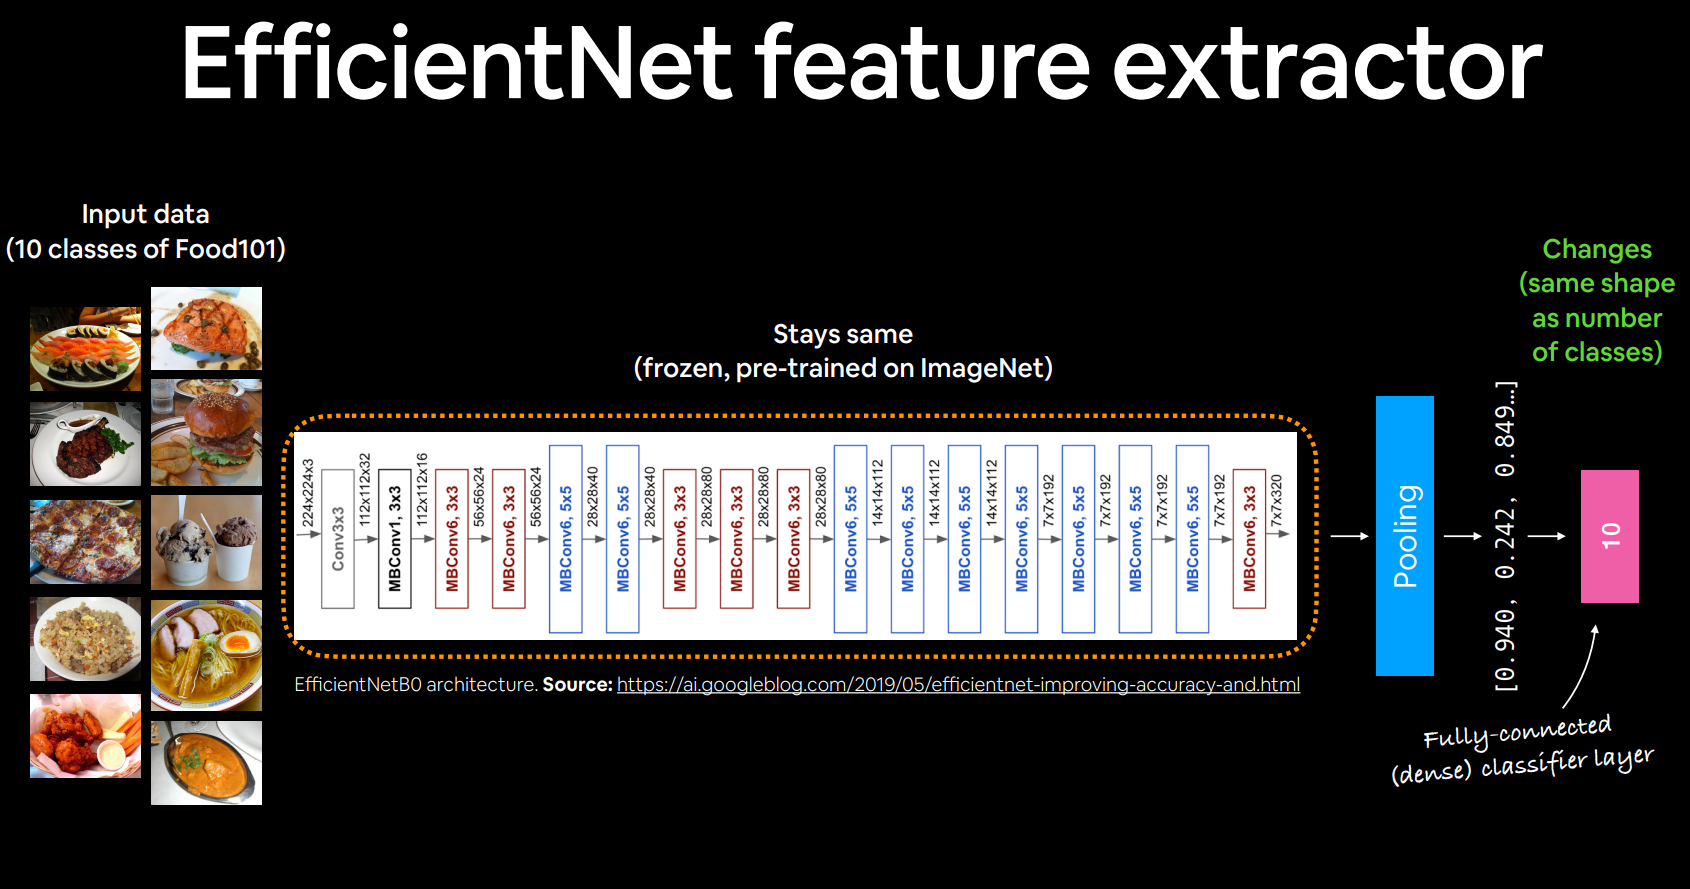

## Running a series of transfer learning experiments

we've seen the incredible results transfer learning can get with only 10% of the training data, but how does it go with 1% of the training data..... how about we set up a bunch of experiments to find out:

1. model1 - use feature extraction transfer learning with 1% of the training data with data augmentation.
2. model2 - use feature extraction transfer learning with 10% of the training data with data augmentation.
3. model3 - use fine-tuning transfer learning on 10% of the training data with data augmentation.
4. model4 - use fine-tuning transfer learnign with 100% of the training data with data augmentation.

### Model1

In [18]:
dataset1 = 'datasets/10_food_classes_1_percent/'

In [19]:
helper_functions.walk_through_dir(dataset1)
#there are 250 images per class for testing but only 7 images per class for training.....

There are 2 directories and 0 images in 'datasets/10_food_classes_1_percent/'.
There are 10 directories and 0 images in 'datasets/10_food_classes_1_percent/test'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_percent/test\chicken_curry'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_percent/test\chicken_wings'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_percent/test\fried_rice'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_percent/test\grilled_salmon'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_percent/test\hamburger'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_percent/test\ice_cream'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_percent/test\pizza'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_percent/test\ramen'.
There are 0 directories and 250 images in 'datasets/10_food_classes_1_p

In [20]:
train_dir_1_percent = 'datasets/10_food_classes_1_percent/train'

test_dir = 'datasets/10_food_classes_1_percent/test'

#### set up dataloaders

In [21]:
# set up dataloaders

IMG_SIZE = (224,224)
BATCH_SIZE = 32
EPOCHS = 5

train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                          label_mode = 'categorical',
                                                                          image_size = IMG_SIZE,
                                                                          batch_size = BATCH_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode = 'categorical',
                                                               image_size = IMG_SIZE,
                                                               batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#### create data_aug layer

In [22]:
# data augmentation is no longer added during the traindatagen but rather after in a specific layer.
#we can use tf.keras.layers.experimental.preprocessing()
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNetB0
], name ="data_augmentation")

benefits of using data aug inside the model include:
* preprocessing images happens on the gpu which is much faster than using the imagedatagenerator which augs images on the cpu
* image dat aug only happens during training, so we can still export our whole model and use it elsewhere.


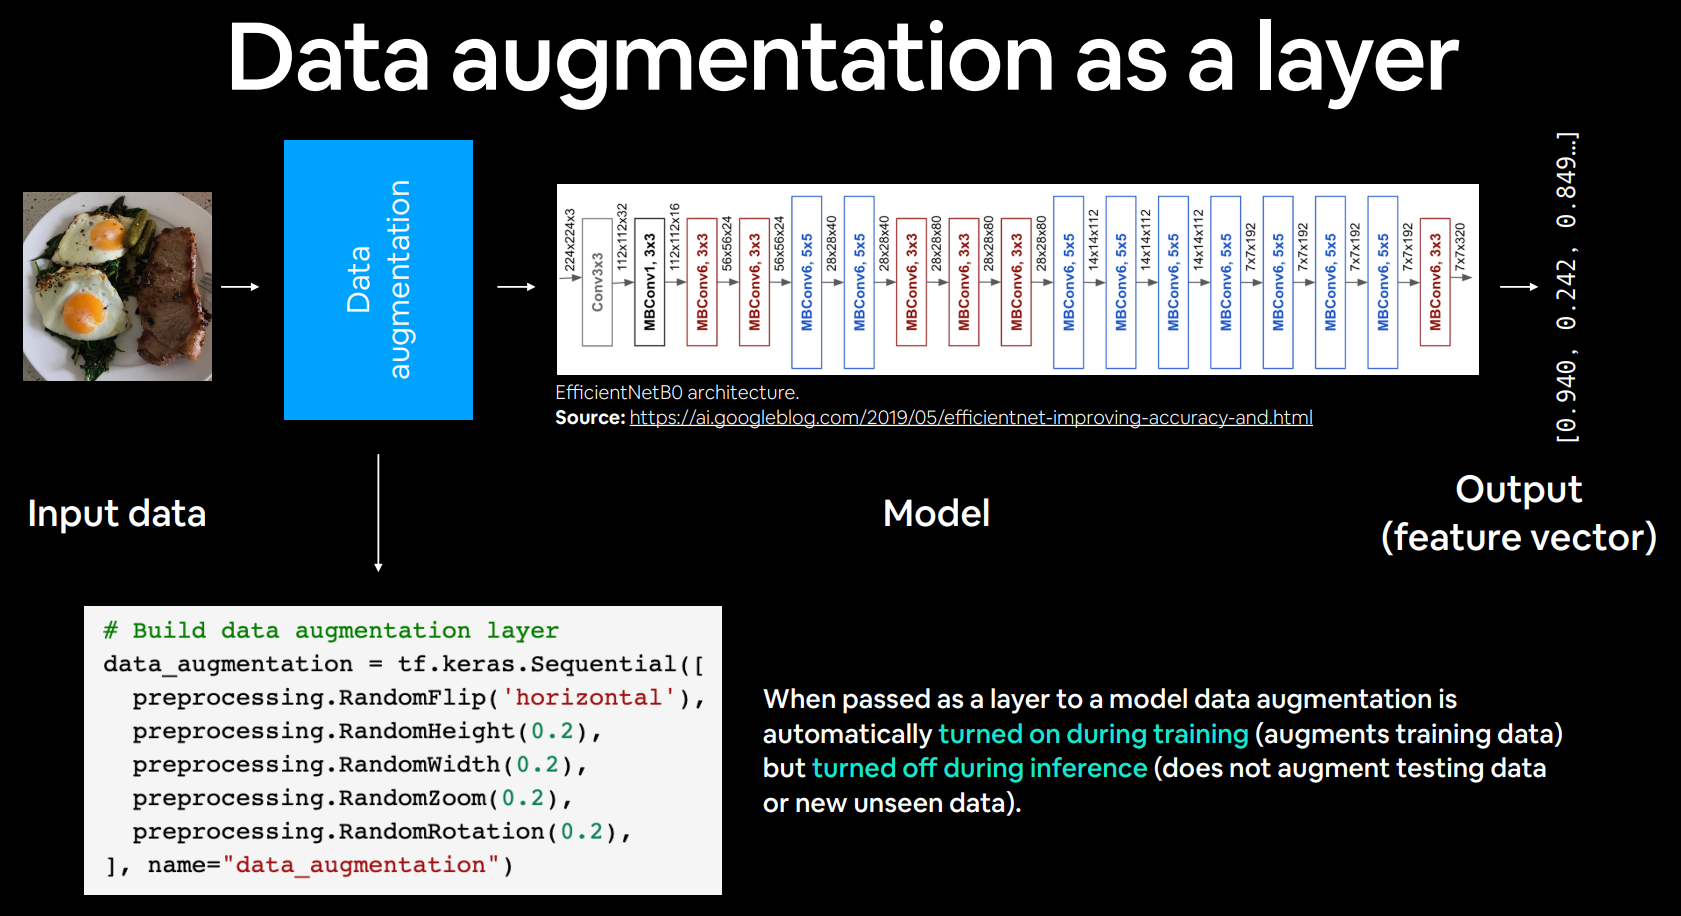

#### test data_aug layer through vis

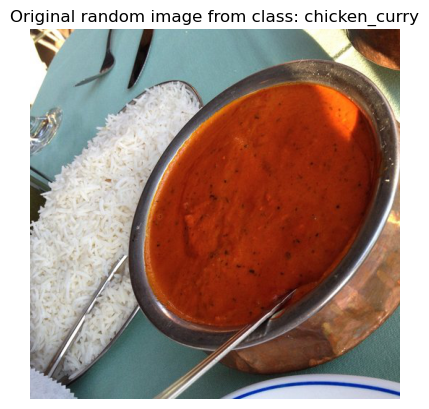

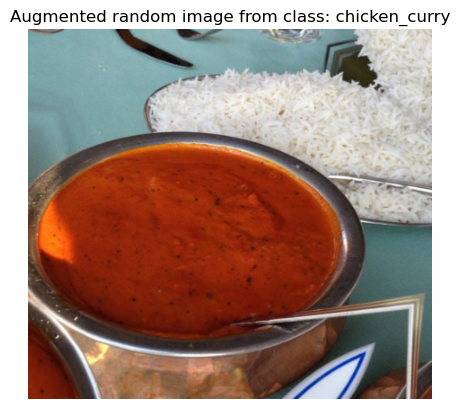

In [23]:
#view a random image and compare it to it's augmented version
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "datasets/10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0), training = True) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

#### Actually building model1

In [24]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model1 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model1.trainable = False

# Create input layer
inputs1 = layers.Input(shape=input_shape, name="input_layer")

# Add in data augmentation Sequential model as a layer
x1 = data_augmentation(inputs1)

# Give base_model inputs (after augmentation) and don't train it
x1 = base_model1(x1, training=False)

# Pool output features of base model
x1 = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x1)

# Put a dense layer on as the output
outputs1 = layers.Dense(10, activation="softmax", name="output_layer")(x1)

# Make a model with inputs and outputs
model1 = keras.Model(inputs1, outputs1)

# Compile the model
model1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history1 = model1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps= len(test_data), # validate for less steps
                    # Track model training logs
                    callbacks=[helper_functions.create_tensorboard_callback("transfer_learning_hub", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning_hub/1_percent_data_aug/20231108-214914
Epoch 1/5
3/3 [==============================] - 12s 4s/step - loss: 2.4208 - accuracy: 0.1000 - val_loss: 2.2342 - val_accuracy: 0.1872
Epoch 2/5
3/3 [==============================] - 7s 3s/step - loss: 2.1794 - accuracy: 0.2429 - val_loss: 2.0983 - val_accuracy: 0.2688
Epoch 3/5
3/3 [==============================] - 7s 3s/step - loss: 1.9183 - accuracy: 0.4286 - val_loss: 1.9787 - val_accuracy: 0.3580
Epoch 4/5
3/3 [==============================] - 7s 3s/step - loss: 1.7251 - accuracy: 0.5857 - val_loss: 1.8720 - val_accuracy: 0.4380
Epoch 5/5
3/3 [==============================] - 7s 3s/step - loss: 1.6214 - accuracy: 0.6143 - val_loss: 1.7798 - val_accuracy: 0.4908


pretty decent results of 36% val accuracy for only using 7 images per class

In [25]:
#check out model summary
model1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [26]:
#eval on the full test dataset
results1 = model1.evaluate(test_data)

79/79 [==============================] - 6s 73ms/step - loss: 1.7798 - accuracy: 0.4908


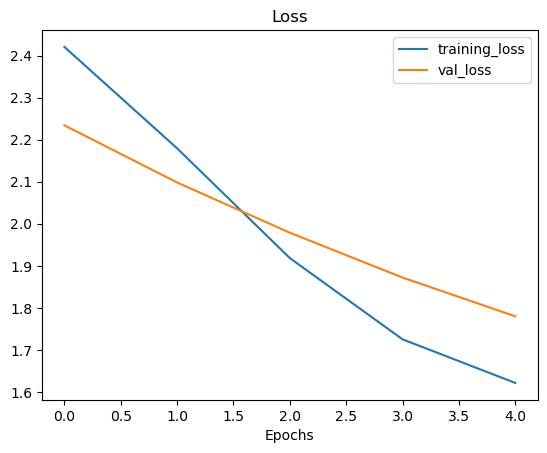

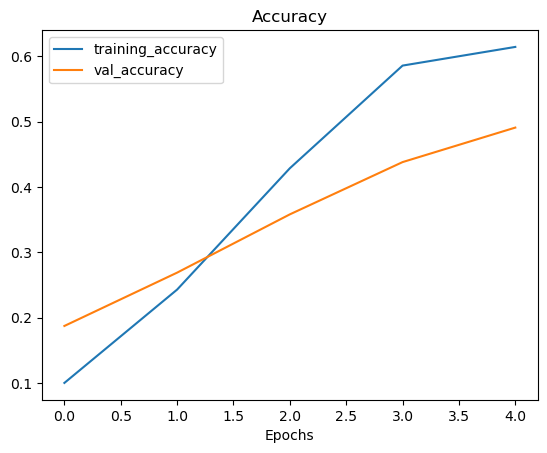

In [27]:
#loss curves
helper_functions.plot_loss_curves(history1)

### Model2
feature extraction transfer learning model with 10% of the data and data augmentation.


In [28]:
train_dir_10_percent = 'datasets/10_food_classes_10_percent/train'
test_dir = 'datasets/10_food_classes_10_percent/test'

#### set up data loaders

In [29]:
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                           image_size = (224,224),
                                                                           batch_size = 32,
                                                                           label_mode = 'categorical')
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               image_size = (224,224),
                                                               batch_size = 32,
                                                               label_mode = 'categorical')

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


#### create data aug layer

In [30]:
data_aug2 = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2),
    tf.keras.layers.RandomZoom(0.2)
], name = 'data_aug2')

#### creating model checkpoint callback
helpful if training takes a long time and we can't get it all done in 1 sitting. Or have a
fear that something will crash at one point or another.

In [31]:
cp_path = 'transfer_learning_hub/10_percent_checkpoints_weights/checkpoint.ckpt'
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = cp_path, 
                                                save_weights_only = True, 
                                                save_best_only = False, 
                                                save_freq = 'epoch', 
                                                verbose = 1)

#### model setup with data aug

In [32]:
input_shape = (224,224,3)
#create a frozen base model (also called backbone)
base_model2 = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top = False)
#turn trainability off for the model
base_model2.trainable = False
#create input and outputs (and layers in between)
inputs2 = tf.keras.layers.Input(shape = input_shape, name = 'input_layer2')

x2 = data_aug2(inputs2)

x2 = base_model2(x2, training = False)  #pass aug images to base model but keeps the basemode in inference mode
                                        #this also ensures batchnorm layers dont get updated
#create feature vector using gap
x2 = tf.keras.layers.GlobalAveragePooling2D(name = 'gap2')(x2)
#create output layer
outputs2 = tf.keras.layers.Dense(10, activation = 'softmax', name = 'output_layer2')(x2)
#create model with inputs and outputs
model2 = tf.keras.Model(inputs2, outputs2)

model2.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history2 = model2.fit(train_data_10_percent,
                     epochs = 5,
                     steps_per_epoch = len(train_data_10_percent),
                     validation_data = test_data,
                     validation_steps = len(test_data),
                     callbacks = [helper_functions.create_tensorboard_callback('transfer_learning_hub',
                                                                                '10_percent_data_aug'),
                                 checkpoint])

Saving TensorBoard log files to: transfer_learning_hub/10_percent_data_aug/20231108-215002
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 2.0156 - accuracy: 0.3267
Epoch 1: saving model to transfer_learning_hub/10_percent_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 22s 777ms/step - loss: 2.0156 - accuracy: 0.3267 - val_loss: 1.4717 - val_accuracy: 0.6368
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.4055 - accuracy: 0.6267
Epoch 2: saving model to transfer_learning_hub/10_percent_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 14s 595ms/step - loss: 1.4055 - accuracy: 0.6267 - val_loss: 1.0492 - val_accuracy: 0.7496
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.1112 - accuracy: 0.7227
Epoch 3: saving model to transfer_learning_hub/10_percent_checkpoints_weights\checkpoint.ckpt
24/24 [==============================] - 15s 631ms/step - loss: 1.1112 - accuracy: 0

In [33]:
model0.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.5851 - accuracy: 0.8568


[0.5851203799247742, 0.8568000197410583]

In [34]:
model2.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.6484 - accuracy: 0.8308


[0.6484191417694092, 0.8307999968528748]

as you can see, model0 (w/0 data aug) performed slightly better than model2 (with data aug)

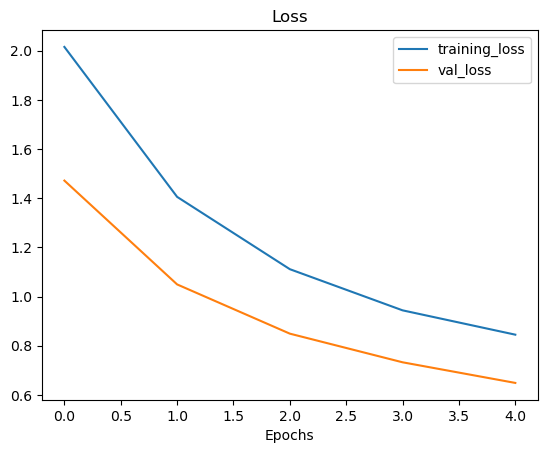

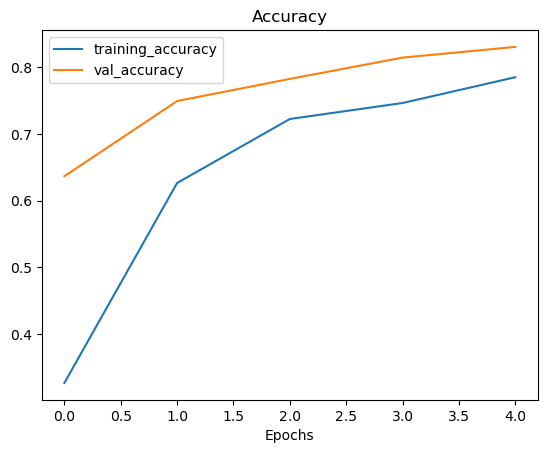

In [35]:
helper_functions.plot_loss_curves(history2)

Looks like the performance would continue getting better with a bit more training.

#### load and compare saved weights from model2 weights.
loading in checkpointed weights returns a model to a specific checkpoint.

In [36]:
#load in saved model weights and evaluate model
#we override model2's existing weights witht he checkpoint weights it should give the same resutls
model2.load_weights(cp_path)

In [37]:
#evaluate model2 with loaded weights
model2.evaluate(test_data)

79/79 [==============================] - 5s 61ms/step - loss: 0.6484 - accuracy: 0.8308


[0.6484191417694092, 0.8307999968528748]

the results with the loaded weights match the weights from the original model, indicating that it worked correctly.

### Preparing Model3 (our first fine-tuned model)
fine tuning an existing model on 10% of the data

fine tuning usually works best after training a feature extraction model for a few epochs with large amounts of custom data.  (aka we want to build a feature extractor layer like we previously did, then we unfreeze a few of the layers


model3 is really just going to be a fine-tuned version of model2

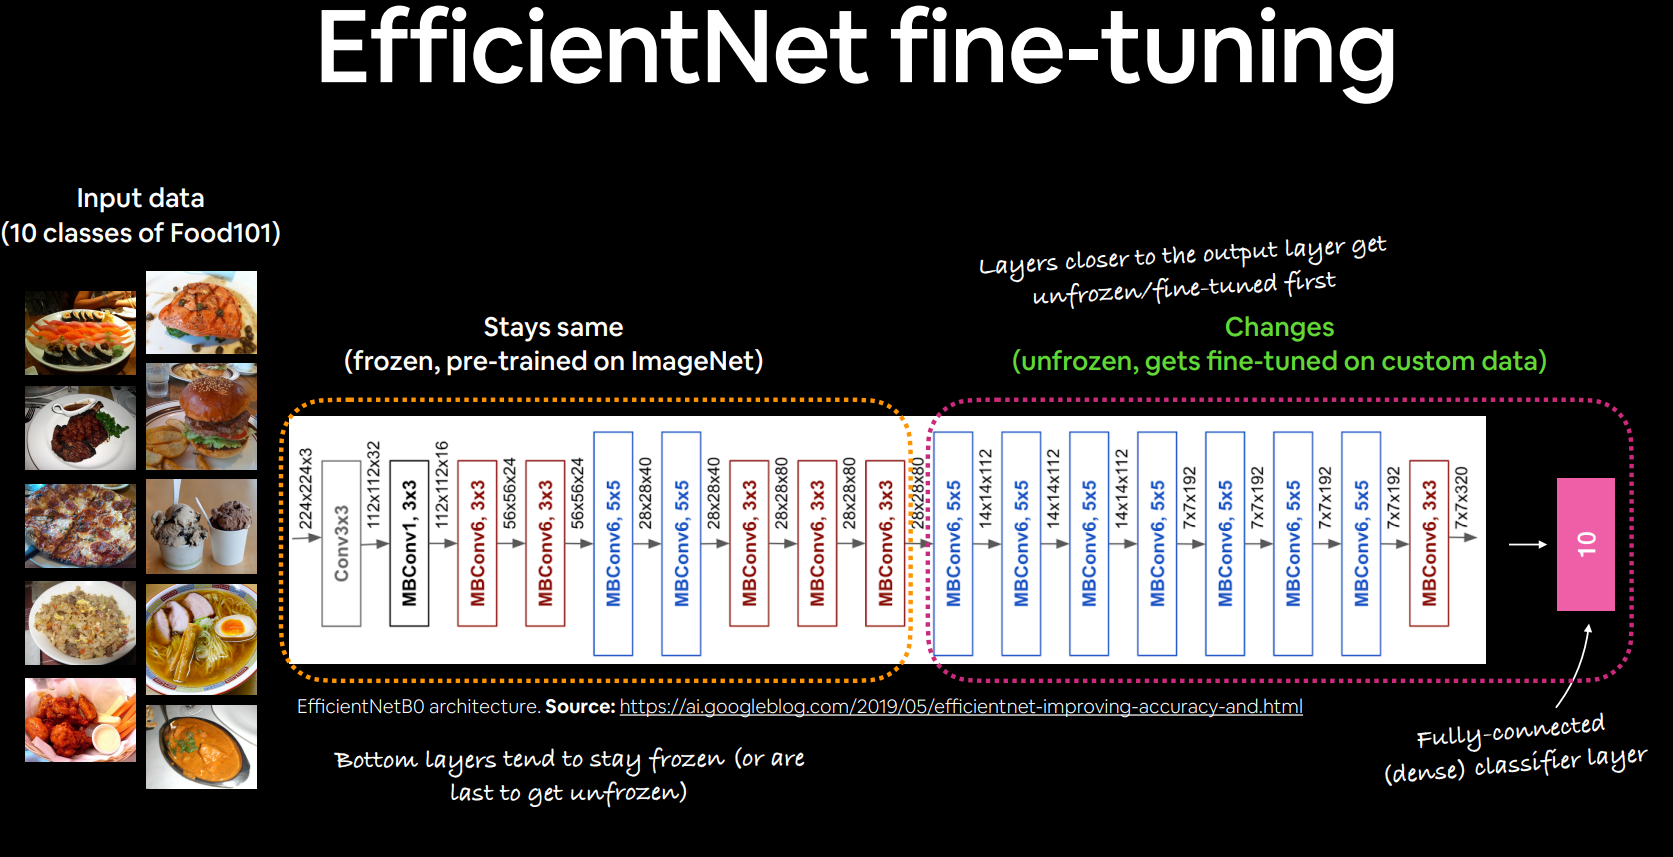

the top is the output layer for some reason....

we usually only unfreeze layers closer to the top (output layer)

usually the base layers (ones closer to the input) learn the more general features in images.

The higher end layers (closer to the output) learn more fine grained features.

In [39]:
#check out layers in loaded model
model2.layers

In [40]:
#are these layers trainable
for layer in model2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000023A858EE3A0> True
<keras.engine.sequential.Sequential object at 0x0000023A1663B130> True
<keras.engine.functional.Functional object at 0x0000023A8590E190> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x0000023A7C658910> True
<keras.layers.core.dense.Dense object at 0x00000239EDFC5460> True


In [41]:
#what layers are in the base model (we set base_model to not be trainable)
for i, layer in enumerate(model2.layers[2].layers):
    print(i, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [42]:
#how many trainable variables are in our base_model?
print(len(model2.layers[2].trainable_variables))

0


#### setting variables to trainable and recompiling the model

In [45]:
#to begin fine tunig we'll start by setting last 10 layers of base_mode.trainable = True
base_model2.trainable = True

# freeze all layers except last 10
for layer in base_model2.layers[:-10]:
    layer.trainable = False
    
#recompile the model every time we make a change
#because the patterns already have some knowledge we actually want to limit the aamount
#the new trainable layers can learn.
#to do this we actually decrease the learning rate by a factor of 10
model2.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), 
              metrics = ['accuracy'])

In [46]:
#cehck whick layers are tunable
for layer_number, layer in enumerate(model2.layers[2].layers):
    print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

only the last 10 layers are actually trainable

In [47]:
#we we've unfrozen some of the layers closer to the top, how many trainable vars are there
print(len(model2.trainable_variables))

12


In [49]:
model2.trainable_variables

[<tf.Variable 'block6h_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.00207604,  0.01300672,  0.02047416, ..., -0.02240255,
           -0.07708141, -0.00094655],
          [-0.06357138,  0.0959678 , -0.05430871, ..., -0.01352078,
           -0.05987524, -0.11093444],
          [ 0.0068749 , -0.04681807, -0.01513974, ...,  0.03073284,
           -0.01280731,  0.03616464],
          ...,
          [ 0.11381665,  0.00804447, -0.05432149, ...,  0.08015257,
           -0.06561387, -0.05522665],
          [-0.12468243,  0.06938899, -0.07634895, ...,  0.01121222,
           -0.0128268 ,  0.10406019],
          [-0.04722364,  0.10557885,  0.16247186, ...,  0.04582691,
            0.01228108, -0.04941604]]]], dtype=float32)>,
 <tf.Variable 'block6h_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([ 0.04594925,  2.5461788 , -1.426646  , -0.7885664 , -0.24730209,
        -0.5630991 , -0.6161863 , -0.4029834 , -1.4444699 , -1.0481553 ,
        -0.21704195,

#### fine tuning for another 5 epochs

now we'll train the trainable layers with 5 more epochs

In [51]:
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

#refit the model (same as model2 except with more trainable layers)
history3 = model2.fit(train_data_10_percent,
                     epochs = 10,
                     steps_per_epoch = len(train_data_10_percent),
                     validation_data = test_data,
                     validation_steps = len(test_data),
                     initial_epoch = history2.epoch[-1], #resuem training where we left off
                     callbacks = [helper_functions.create_tensorboard_callback('transfer_learning_hub',
                                                                                'fine_tuning')])

Saving TensorBoard log files to: transfer_learning_hub/fine_tuning/20231109-192722
Epoch 5/10
24/24 [==============================] - 22s 641ms/step - loss: 0.7297 - accuracy: 0.7880 - val_loss: 0.5299 - val_accuracy: 0.8312
Epoch 6/10
24/24 [==============================] - 13s 552ms/step - loss: 0.6010 - accuracy: 0.8267 - val_loss: 0.4803 - val_accuracy: 0.8408
Epoch 7/10
24/24 [==============================] - 13s 541ms/step - loss: 0.5553 - accuracy: 0.8240 - val_loss: 0.4688 - val_accuracy: 0.8400
Epoch 8/10
24/24 [==============================] - 13s 538ms/step - loss: 0.4992 - accuracy: 0.8507 - val_loss: 0.4592 - val_accuracy: 0.8464
Epoch 9/10
24/24 [==============================] - 12s 523ms/step - loss: 0.4699 - accuracy: 0.8493 - val_loss: 0.4431 - val_accuracy: 0.8520
Epoch 10/10
24/24 [==============================] - 11s 478ms/step - loss: 0.4598 - accuracy: 0.8453 - val_loss: 0.4388 - val_accuracy: 0.8540


we can see it starts with epoch 5 of 10.

In [52]:
#evaluate the fine-tuned model (model2 file tuned)
model2.evaluate(test_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.4388 - accuracy: 0.8540


[0.4388073682785034, 0.8539999723434448]

before fine-tuning the model2 evaluate was at 83%. 

after fine-tuning it has an accuracy of 85%

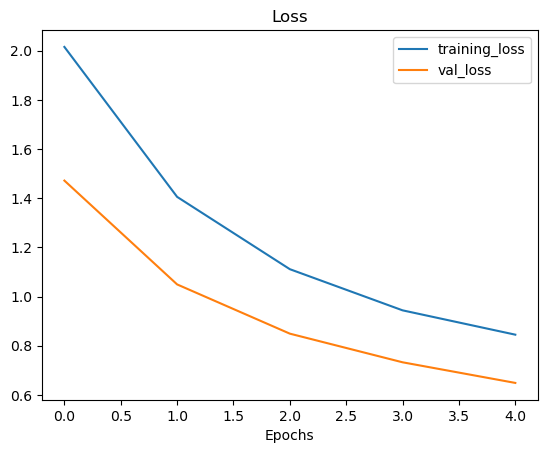

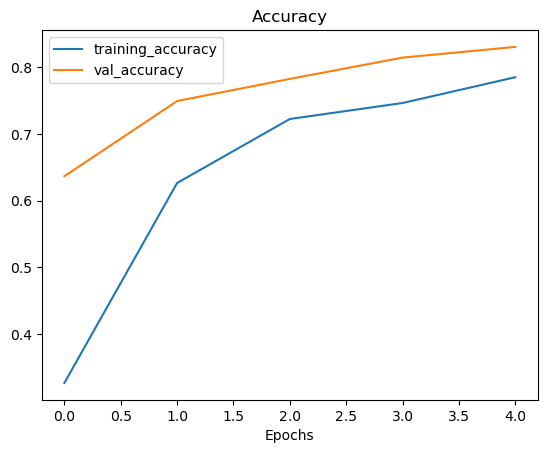

In [53]:
#lets compare the 2 training histories
helper_functions.plot_loss_curves(history2)

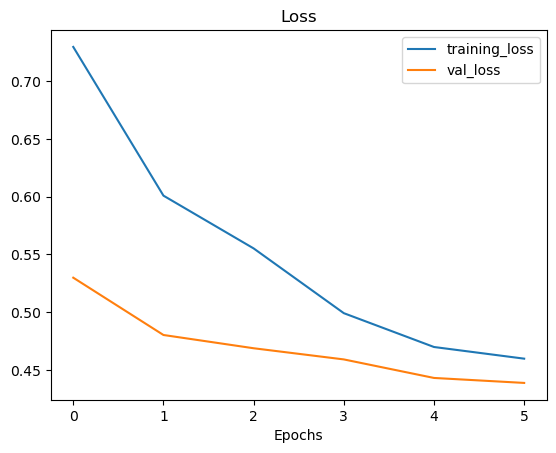

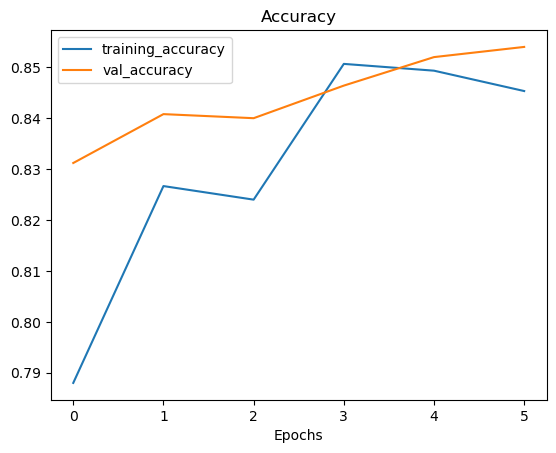

In [54]:
helper_functions.plot_loss_curves(history3)

In [62]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.3266666531562805, 0.6266666650772095, 0.7226666808128357, 0.746666669845581, 0.7853333353996277, 0.7879999876022339, 0.8266666531562805, 0.8240000009536743, 0.8506666421890259, 0.8493333458900452, 0.8453333377838135]


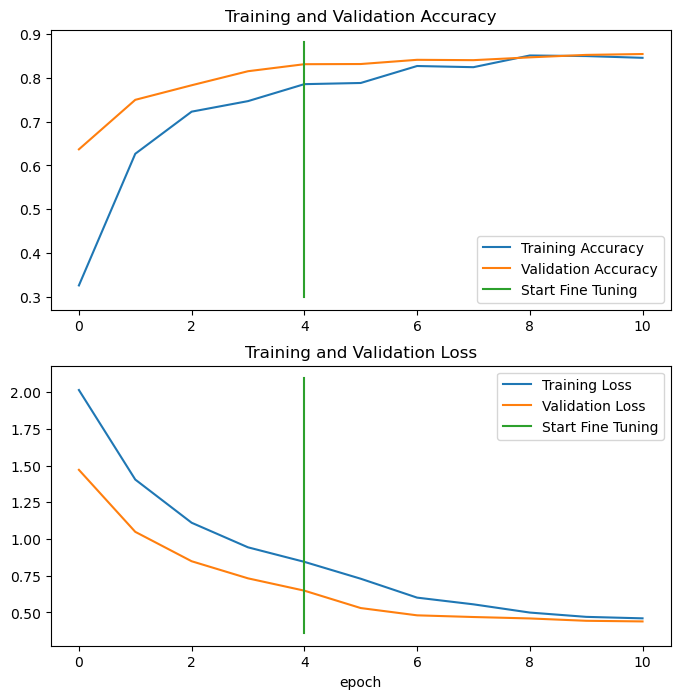

In [64]:
compare_historys(history2, history3)

after fine-tuning starts we can see convergence between the training and validation curves.

### Model4
similar to model3 but now we're using more data for the fine-tuning

In [67]:
train_dir_all_data = 'datasets/10_food_classes_all_data/train/'
test_dir = 'datasets/10_food_classes_all_data/test/'

In [69]:
#how many images are we working with now
#250 test images per class
#750 train images per class
helper_functions.walk_through_dir('datasets/10_food_classes_all_data/')

There are 2 directories and 0 images in 'datasets/10_food_classes_all_data/'.
There are 10 directories and 0 images in 'datasets/10_food_classes_all_data/test'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test\chicken_curry'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test\chicken_wings'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test\fried_rice'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test\grilled_salmon'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test\hamburger'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test\ice_cream'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test\pizza'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test\ramen'.
There are 0 directories and 250 images in 'datasets/10_food_classes_all_data/test

In [70]:
#turn the data into tensor datasets
import tensorflow as tf
IMG_SIZE = (224,224)

train_data_100_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_all_data,
                                                                            label_mode = 'categorical',
                                                                            image_size = IMG_SIZE
                                                                            )
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode = 'categorical',
                                                               image_size = IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


since we're doing fine tuning we'll actually have to load in the weights from model2 (just like we did for model3).

In [71]:
#evaluate model2 (this is the fine-tuned on 10 percent of data version)
model2.evaluate(test_data)

79/79 [==============================] - 6s 67ms/step - loss: 0.4388 - accuracy: 0.8540


[0.43880727887153625, 0.8539999723434448]

In [72]:
#revert model2 back to the checkpointed version of model2 (before we did the fine-tuning) to it's
#feature extraction weights
model2.load_weights(cp_path)

In [73]:
model2.evaluate(test_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.6484 - accuracy: 0.8308


[0.6484191417694092, 0.8307999968528748]

we can tell the model weights have been reverted because now they're worse than the results we got after the last stage of fine-tuning.

In [76]:
for i, layer in enumerate(model2.layers[2].layers):
    print(i, layer.name, layer.trainable)
#although we reloaded the weights in model2, it's still trainable because
#we it was last compiled with training layers on

0 input_3 False
1 rescaling_2 False
2 normalization_2 False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [77]:
#since we made a change to model2 (reloaded weights) we need to recompile
model2.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
              metrics = ['accuracy'])



In [78]:
#now we can continue training on the model with 750 images per class
fine_tune_epochs = initial_epochs + 5

history4 = model2.fit(train_data_100_percent,
                     epochs = fine_tune_epochs,
                     steps_per_epoch = len(train_data_100_percent),
                     validation_data = test_data,
                      validation_steps = len(test_data),
                      initial_epoch=history2.epoch[-1],
                      callbacks = [helper_functions.create_tensorboard_callback('transfer_learning_hub/',
                                                                               'fine_tune_all_data')])

Saving TensorBoard log files to: transfer_learning_hub//fine_tune_all_data/20231109-213302
Epoch 5/10
235/235 [==============================] - 75s 300ms/step - loss: 0.7104 - accuracy: 0.7709 - val_loss: 0.3790 - val_accuracy: 0.8724
Epoch 6/10
235/235 [==============================] - 54s 230ms/step - loss: 0.5951 - accuracy: 0.8093 - val_loss: 0.3201 - val_accuracy: 0.8936
Epoch 7/10
235/235 [==============================] - 51s 218ms/step - loss: 0.5387 - accuracy: 0.8277 - val_loss: 0.3023 - val_accuracy: 0.9000
Epoch 8/10
235/235 [==============================] - 46s 194ms/step - loss: 0.5088 - accuracy: 0.8403 - val_loss: 0.2903 - val_accuracy: 0.9028
Epoch 9/10
235/235 [==============================] - 44s 189ms/step - loss: 0.4805 - accuracy: 0.8433 - val_loss: 0.2787 - val_accuracy: 0.9084
Epoch 10/10
235/235 [==============================] - 45s 192ms/step - loss: 0.4481 - accuracy: 0.8552 - val_loss: 0.2713 - val_accuracy: 0.9076


takes quite a bit longer to fine-tune on all the data rather than 10% or 1%.

but the val_accuracy is much better!!

In [79]:
#lets eval on the all the test dat
model2.evaluate(test_data)

79/79 [==============================] - 5s 62ms/step - loss: 0.2713 - accuracy: 0.9076


[0.27131742238998413, 0.9075999855995178]

5
11
[0.3266666531562805, 0.6266666650772095, 0.7226666808128357, 0.746666669845581, 0.7853333353996277, 0.7709333300590515, 0.809333324432373, 0.8277333378791809, 0.8402666449546814, 0.8433333039283752, 0.8551999926567078]


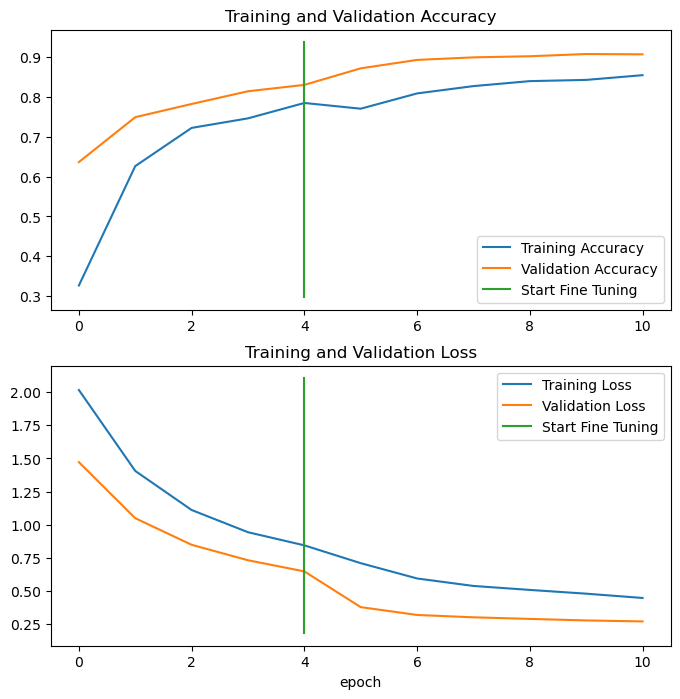

In [80]:
#how did fine_tuning go with more data?
compare_historys(history2, history4)

### Comparing our resutls in tensorboard

In [83]:
%load_ext tensorboard

In [94]:
log_dir = 'logs/fine_tuning/'

In [99]:
%tensorboard --logdir 'transfer_learning_hub/'

Reusing TensorBoard on port 6006 (pid 8252), started 0:10:42 ago. (Use '!kill 8252' to kill it.)